# Assignment 1

This is due in on Wednesday **November 17th before 2pm**. Mark weighting is in brackets. **Do add comments to your code, justifying all your steps and decisions**. You will lose points if your code is hard to understand: code-only submissions without comments or justifications for the steps taken will only get half marks. Graphs without labels (or units when appropriate) are not worth any point.

Save your work to GitHub **after** having run all cells with `Runtime`->`Restart and run all`. Don't change the filename: git will save all the change history, there's no risk of overwriting.

_It is recommended to only attempt this assignment after having gone through this week4 sheet._

For the first assignment you will read in some Raman data from the file [pristine1.txt](https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt). The data consists of two columns of numbers taken by reflecting laser radiation (at a wavelength of $532 nm$) from a single layer of graphene which has been deposited on the surface of silicon.
You might imagine that the reflected light would all be at $532 nm$, but non-linear effects in the graphene mean that various peaks are seen away from this wavelength; these are related to the elastic properties of the graphene structure in response to the electric field of the light.
The columns record the reflectance (in arbitrary units) of the graphene as a function of wave length shift $\Delta\lambda$ away from the laser excitation wave length. (Actually, $\Delta(1/\lambda)$ - called the Raman shift - is recorded, so the units are $1/cm$, also known as ’wavenumber’.)

1. [2] Read in and plot the raw data, use `wget` in the notebook to get the data, using the `! wget` command as seen in class. That way when running the notebook from scratch it will get the data itself.
2. [8] Raman data are normally plotted with the curved background removed, to show the peaks more clearly. Do this. You must fit the background function **only to the data regions without a peak**. Make a plot of your fit over the data, and a plot of the data with the background removed. You will need to decide what background function is appropriate, and write a short justification for your choice (feel free to refer to the literature).
3. [10] Fit the double peak structure around $2450$ and $2660$ wavenumbers. Don’t fit them separately, but define a ’double Gaussian’ function and use that do do the fit. (The very sharp peak near $2340\,1/cm$ can be ignored.)

In [1]:
#1) Reading in and plotting the raw data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
! wget -q https://raw.githubusercontent.com/PX2134/data/master/assignment1/pristine1.txt          #Retrieving the data

[3217.13 3216.43 3215.72 ... 1019.21 1018.19 1017.18]
[ 7434.03  7451.75  7443.65 ... 16016.5  15967.3  15730.6 ]


Text(0.5, 1.0, 'Plot of Raman Shift vs intensity')

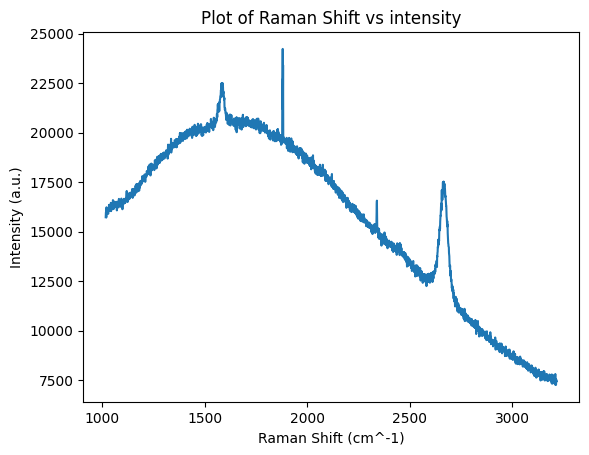

In [4]:
#Loading in the txt file and removing the text rows at the beginning, as well as labelling the variables.
rshift, intensity = np.loadtxt(('pristine1.txt'), unpack = True, skiprows=4)
print(rshift)
print(intensity)

#Plotting the raw data in a graph
plt.plot(rshift, intensity)
plt.xlabel('Raman Shift (cm^-1)')
plt.ylabel('Intensity (a.u.)')
plt.title('Plot of Raman Shift vs intensity')

[5.25207608e+07 1.63805095e+03 1.05339308e+03]


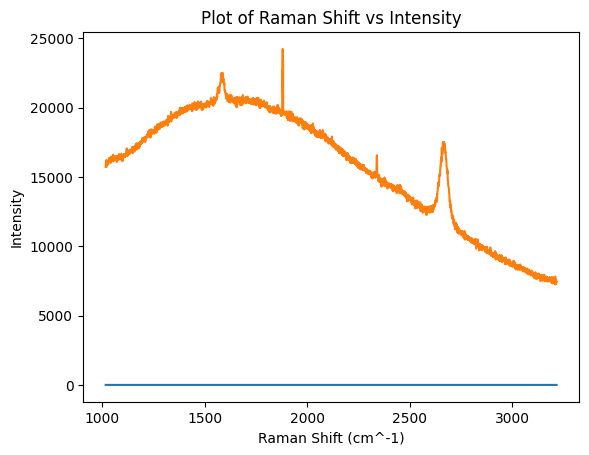

In [5]:
#2) Removing curved backgound to show peaks more clearly at ~1600, 1800, 2300, 2600 cm^-1.

#Trying Gaussian Function
def Gau(x, intensity, mu, sigma):
  return(intensity)/(sigma*np.sqrt(2*np.pi))*np.exp(-((x-mu)**2)/(2*sigma**2))

g_guess=([22500, 1600, 1.75])

popt, pcov = curve_fit(Gau, rshift, intensity, g_guess)   #Making a guess for Gaussian constants

plt.plot(rshift, Gau(intensity, popt[0], popt[1], popt[2]))  #Plotting Gau
plt.xlabel('Raman Shift (cm^-1)')
plt.ylabel('Intensity')
plt.title('Plot of Raman Shift vs Intensity')

plt.plot(rshift, intensity)         #Plotting original raw data
print(popt)

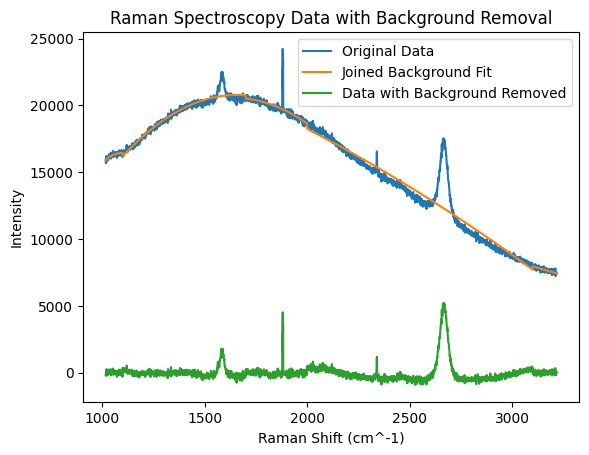

In [8]:
'''Multiple polynomial fits will be used to fit the background for certain sections,

   and then for each rshift section the background will be corrected to create

   one final background corrected fit.'''




# Function to define the polynomial background

def background(x, a, b, c):
   return a * x**2 + b * x + c


# Define the ranges for different sections

section_ranges = [(min(rshift), 1100), (1100, 1700), (1700, 2000), (2000, 3100), (3100, max(rshift))]


# Perform separate polynomial fits for each section

fit_params = []

background_fits = []

for section_range in section_ranges:

    section_mask = (rshift >= section_range[0]) & (rshift <= section_range[1])

    section_rshift = rshift[section_mask]

    section_intensity = intensity[section_mask]



    popt, _ = curve_fit(background, section_rshift, section_intensity)

    fit_params.append(popt)

    background_fits.append(background(rshift, *popt))


# Plotting the original data

plt.plot(rshift, intensity, label='Original Data')


# Plotting the line of the joined polynomials to form the background fit

total_background = np.zeros_like(rshift)

for i, params in enumerate(fit_params):

    section_mask = (rshift >= section_ranges[i][0]) & (rshift <= section_ranges[i][1])

    total_background[section_mask] += background_fits[i][section_mask]

plt.plot(rshift, total_background, label='Joined Background Fit')


# Subtracting the background only in the specific range for which each polynomial is fitted

data_with_background_removed = intensity.copy()

for i, params in enumerate(fit_params):

    section_mask = (rshift >= section_ranges[i][0]) & (rshift <= section_ranges[i][1])

    data_with_background_removed[section_mask] -= background_fits[i][section_mask]


# Plotting the data with total background removed

plt.plot(rshift, data_with_background_removed, label='Data with Background Removed')

plt.xlabel('Raman Shift (cm^-1)')
plt.ylabel('Intensity')
plt.legend()
plt.title('Raman Spectroscopy Data with Background Removal')

plt.show()